Enter month (1–12):  12
Enter year (e.g., 2025):  2028
Enter monthly income:  50000



Predicted Expenses for 2028-12 with 50000.00 income:
Food         : 1614.47
Groceries    : 1788.02
Transport    : 1737.08
Entertainment: 1463.75
Shopping     : 1950.82
Rent         : 4141.89
Bills        : 1718.06
Healthcare   : 824.47
Education    : 922.69
Total_Expenses: 16161.25
Savings      : 33838.75


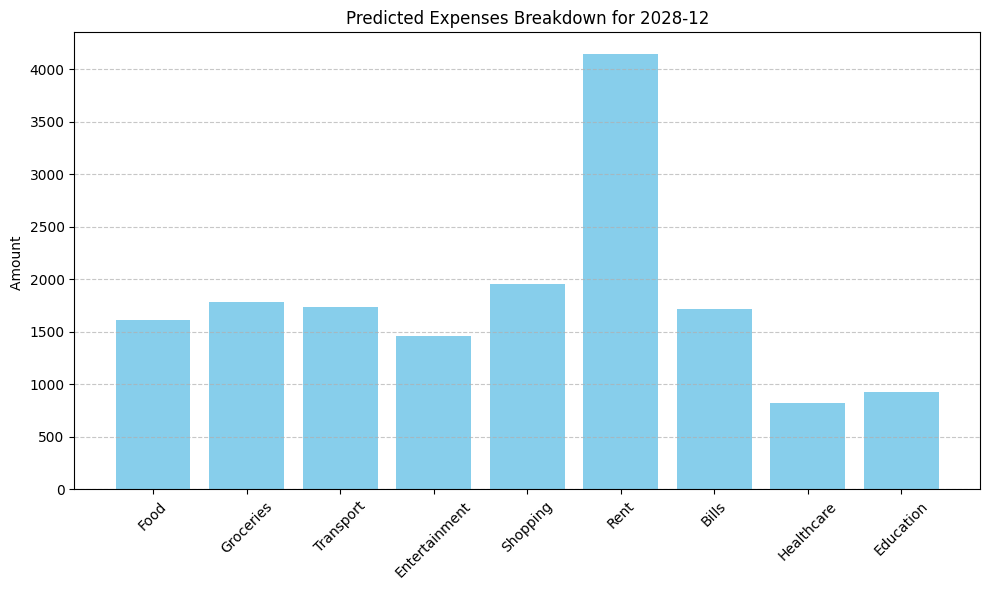

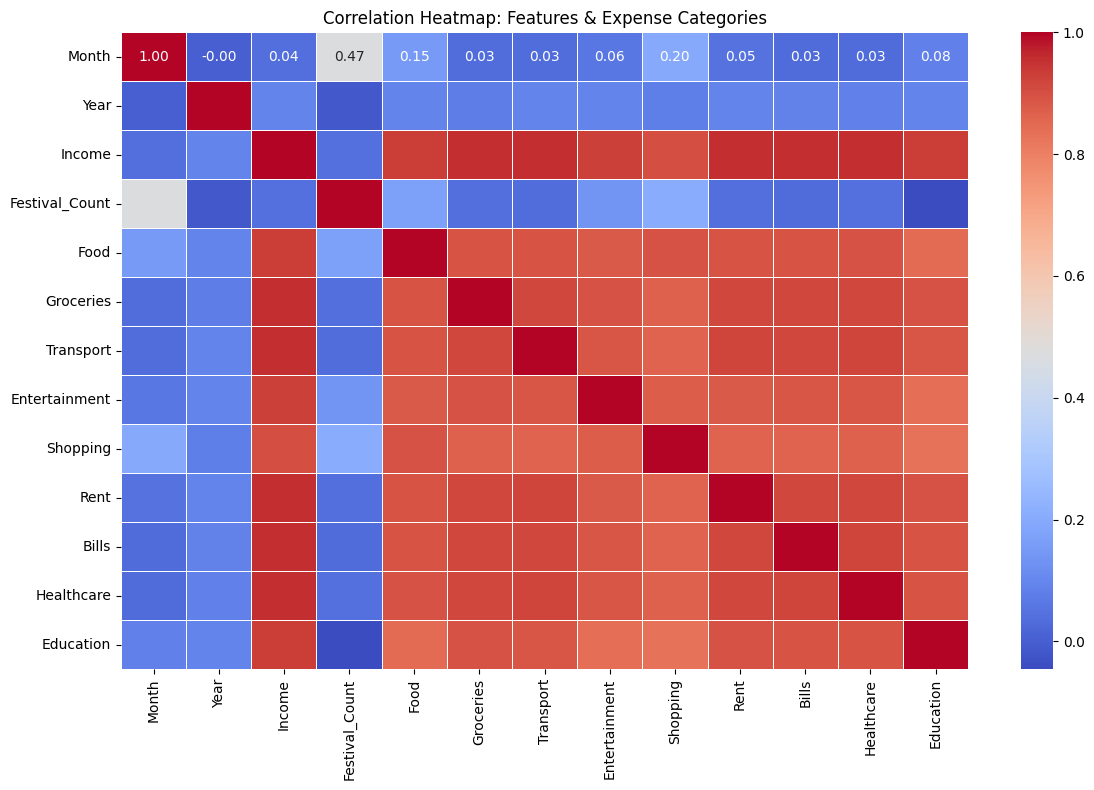


Model Evaluation (MSE, R²):
Food          - MSE: 7892.28, R²: 0.91
Groceries     - MSE: 14264.69, R²: 0.91
Transport     - MSE: 11799.70, R²: 0.89
Entertainment - MSE: 8127.80, R²: 0.88
Shopping      - MSE: 7369.21, R²: 0.89
Rent          - MSE: 64634.70, R²: 0.90
Bills         - MSE: 15855.55, R²: 0.90
Healthcare    - MSE: 2811.81, R²: 0.89
Education     - MSE: 4698.97, R²: 0.89


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("personal_expense_dataset.csv")

feature_cols = ['Month', 'Year', 'Income', 'Festival_Count']
target_cols = [
    'Food', 'Groceries', 'Transport', 'Entertainment', 
    'Shopping', 'Rent', 'Bills', 'Healthcare', 'Education'
]

X = df[feature_cols]
y = df[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


festivals = {
    1: ["New Year's Day"],
    2: ["Valentine's Day", "Chinese New Year"],
    3: ["St. Patrick's Day", "Holi"],
    4: ["Easter", "Earth Day"],
    5: ["Mother's Day", "Memorial Day"],
    6: ["Father's Day", "Juneteenth"],
    7: ["Independence Day", "Eid al-Adha"],
    8: ["Back to School"],
    9: ["Labor Day", "Rosh Hashanah"],
    10: ["Halloween", "Diwali"],
    11: ["Thanksgiving", "Veterans Day"],
    12: ["Christmas", "Hanukkah", "New Year's Eve"]
}

def predict_and_plot_expenses(month, year, income):
    festival_count = len(festivals.get(month, []))
    
    input_df = pd.DataFrame([[month, year, income, festival_count]], columns=feature_cols)
    
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)[0]
    
    results = dict(zip(target_cols, np.round(prediction, 2)))
    total = round(sum(prediction), 2)
    savings = round(income - total, 2)
    
    print(f"\nPredicted Expenses for {year}-{month:02d} with {income:.2f} income:")
    for k, v in results.items():
        print(f"{k:<13}: {v:.2f}")
    print(f"{'Total_Expenses':<13}: {total:.2f}")
    print(f"{'Savings':<13}: {savings:.2f}")
    
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values(), color='skyblue')
    plt.title(f"Predicted Expenses Breakdown for {year}-{month:02d}")
    plt.ylabel("Amount ")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

try:
    month = int(input("Enter month (1–12): "))
    year = int(input("Enter year (e.g., 2025): "))
    income = float(input("Enter monthly income: "))
    
    if 1 <= month <= 12:
        predict_and_plot_expenses(month, year, income)
    else:
        print("Invalid month. Please enter a number from 1 to 12.")
except ValueError:
    print("Invalid input. Please enter numeric values only.")



plt.figure(figsize=(12, 8))
corr = df[feature_cols + target_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Features & Expense Categories")
plt.tight_layout()
plt.show()



print("\nModel Evaluation (MSE, R²):")
for i, category in enumerate(target_cols):
    actual = y_test.iloc[:, i]
    predicted = y_pred[:, i]
    
    mse = mean_squared_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    print(f"{category:<13} - MSE: {mse:.2f}, R²: {r2:.2f}")